In [1]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volodymyrgavrysh/heart-disease")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\student\.cache\kagglehub\datasets\volodymyrgavrysh\heart-disease\versions\1


In [37]:
import pandas as pd

In [38]:
data = pd.read_csv(r'C:\Users\student\.cache\kagglehub\datasets\volodymyrgavrysh\heart-disease\versions\1\heart.csv')


In [39]:
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

In [41]:
X, y = df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

models = {
    "L1": LogisticRegression(penalty="l1", solver="liblinear", random_state=42),
    "L2": LogisticRegression(penalty="l2", solver="liblinear", random_state=42),
    "ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=5000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, preds))
    print(f"{name} Mean Squared Error : ", mean_squared_error(y_test , preds))
    print(classification_report(y_test, preds))


L1 Accuracy: 0.8524590163934426
L1 Mean Squared Error :  0.14754098360655737
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

L2 Accuracy: 0.8524590163934426
L2 Mean Squared Error :  0.14754098360655737
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ElasticNet Accuracy: 0.8524590163934426
ElasticNet Mean Squared Error :  0.14754098360655737
              precision    recall  f1-score   support

           0       0.83      0.86      0.85 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
df = pd.DataFrame({
    "Hours_Studied" : [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0],
    "Score" : [10,25,35,50,65,70,85,88,94,98]
})

student.head()



,Hours_Studied,Score
0,1.0,10
1,2.0,25
2,3.0,35
3,4.0,50
4,5.0,65


In [44]:
X = df[['Hours_Studied']]
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9994730767518011
MSE: 0.6271703961687202


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


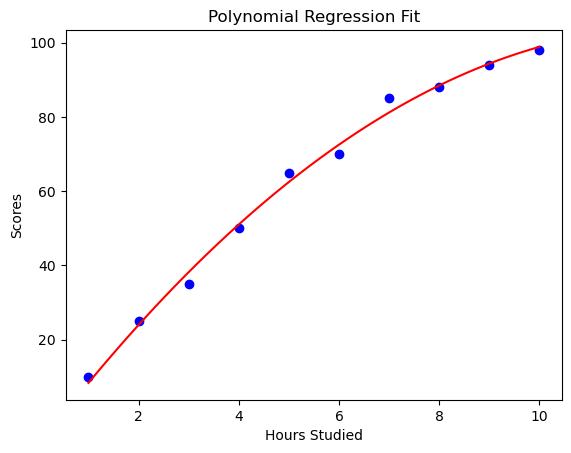

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X, y, color='blue')

X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Polynomial Regression Fit")
plt.show()
